# Runge Kutta 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Integrate(func,x0,y0,x,h):
    # Finds value of y for a given x using step size h 
    # and initial value y0 at x0.
    def RK4(func,x0,y0,h):
        K0 = h*func(x0,y0)
        K1 = h*func(x0 + 0.5*h, y0 + 0.5*K0)
        K2 = h*func(x0 + 0.5*h, y0 + 0.5*K1)
        K3 = h*func(x0 + h, y0 + K2)
        return (K0 + 2.*K1 + 2.*K2 + K3)/6.
    X = []
    Y = []
    X.append(x0)
    Y.append(y0)
    while x0 < x:
         # Count number of iterations using step size or
        h = min(h,x - x0)# step height h
        y0 = y0 + RK4(func,x0,y0,h)#update next value of y
        x0 = x0 + h#update next value of x
        X.append(x0)
        Y.append(y0)
    return np.array(X),np.array(Y)

Sea el problema de valores iniciales

$$y'' = -0.1y' -x$$

$$y(0) = 0$$
$$y'(0) = 1$$
cuya solución analítica es 
$$y = 100x - 5x^{2} + 990(e^{-0.1x}-1)$$

Haciendo $y_{0} = y$ y $y_{1} = y1$ las ecuaciones de primer orden son

$$F(x,y) = \begin{pmatrix}y_{0}' \\ y_{1}'\end{pmatrix} = \begin{pmatrix} y_{1}\\ -0.1y_{1}-x\end{pmatrix}$$

In [3]:
def F(x,y):
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = -0.1*y[1] - x
    return F

In [4]:
x = 0.0#start of integration
xStop = 2.#End of integration
y = np.array([0.,1.])#initial valie of y
h = 0.2#step size

In [5]:
X,Y = Integrate(F,x,y,xStop,h)

In [6]:
yExact = 100.0*X - 5.0*X**2 + 990.0*(np.exp(-0.1*X)-1.)

Text(0, 0.5, 'y')

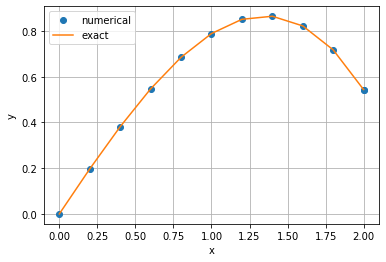

In [7]:
plt.plot(X,Y[:,0],'o',label='numerical')
plt.plot(X,yExact,'-',label='exact')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x');plt.ylabel('y')

# Raíces de una función
Método Newton-Raphson

In [8]:
##Module swap
# SwapRoes(v,i,j), swaps rows i and j of a vector or matrix [v]
def swapRows(v,i,j):
    if len(v.shape)==1:
        v[i],v[j] = v[j],v[i]
    else:
        v[[i,j],:] = v[[j,i],:]
#swapCols(v,i,j), swaps colums of a matrix [v]
def swapCols(v,i,j):
    v[:,[i,j]] = v[:,[j,i]]

In [9]:
def gaussPivot(a,b,tol=1.0e-12):
    n = len(b)
    #Set up scale factors
    s = np.zeros(n)
    for i in range(n):
        s[i] = max(np.abs(a[i,:]))
    for k in range(0,n-1):
        #Row interchange, if needed
        p = np.argmax(np.abs(a[k:n,k]/s[k:n])) + k
        if abs(a[p,k])<tol: quit('Matrix is singular')
        if p!=k:
            swapRows(b,k,p)
            swapRows(s,k,p)
            swapRows(a,k,p)
        #Elimination
        for i in range(k+1,n):
            if a[i,k]!=0.0:
                lam = a[i,k]/a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                b[i] = b[i] - lam*b[k]
    if abs(a[n-1,n-1])<tol:quit('Matrix is singular')
    #Back substitution
    b[n-1] = b[n-1]/a[n-1,n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    return b

In [10]:
def newtonRaphson2(f,x,tol=1.0e-9): 
    def jacobian(f,x):
        global jac
        h = 1.0e-4
        n = len(x)
        jac = np.zeros((n,n))
        f0 = f(x)
        for i in range(n):
            temp = x[i]
            x[i] = temp + h
            f1 = f(x)
            x[i] = temp
            jac[:,i] = (f1 - f0)/h
        return jac, f0
    
    for i in range (30):
        jac,f0 = jacobian(f,x)
        if np.sqrt(np.dot(f0,f0)/len(x)) < tol: return x
        dx = gaussPivot(jac,-f0)
        x = x + dx
        if np.sqrt(np.dot(dx,dx)) < tol*max(max(abs(x)),1.0):
            return x

Sea el siguiente sistema de ecuaciones:
$$f_{1}(x,y,z) = \sin{x} + y^{2} + \ln{z} - 7 = 0$$
$$f_{2}(x,y,z) = 3x + 2^{y} - z^{3} + 1 = 0$$
$$f_{3}(x,y,z) = x + y + z-5 = 0$$
Cuya matriz jacobiana está dada por
$$J(x,y,z) =  \begin{pmatrix} \frac{\partial f_{1}}{\partial x} & \frac{\partial f_{1}}{\partial y} & \frac{\partial f_{1}}{\partial z} \\ \frac{\partial f_{2}}{\partial x} & \frac{\partial f_{2}}{\partial y} & \frac{\partial f_{2}}{\partial z} \\ \frac{\partial f_{3}}{\partial x} & \frac{\partial f_{3}}{\partial y} & \frac{\partial f_{3}}{\partial z} \end{pmatrix} = \begin{pmatrix} \cos{x} & 2y & \frac{1}{z} \\ 3 & 2^{y}\ln{2} & -3z \\ 1 & 1 &1 \end{pmatrix}$$

In [11]:
def f(x):
    f = np.zeros(len(x))
    f[0] = np.sin(x[0]) + x[1]**2. + np.log(x[2]) - 7.
    f[1] = 3.*x[0] + 2.**x[1] - x[2]**3. + 1.
    f[2] = x[0] + x[1] + x[2] - 5.
    return f

In [12]:
x = np.array([1.,1.,1.])

In [13]:
print(newtonRaphson2(f,x))

[0.59905376 2.3959314  2.00501484]


# Método de Shooting

## Pozo cuadrado infinito en coordenadas esféricas

Sea la siguiente ecuación diferencial

$$\frac{d^{2}u}{dr^{2}} = -k^{2} u$$,
donde $k=\frac{\sqrt{2mE}}{\hbar}$

con las siguientes condiciones de frontera
$$ u(0) = 0$$
$$u(1) = 0$$

Haciendo el siguiente cambio de variable
$$y_{0} = u$$,
$$y_{1} = u'$$,
$$y_{2} = 0$$,
$$y_{3} = \int_{0}^{r}|u|^{2}dr$$,

Podemos escribir a la ecuación diferencial de la siguiente forma

$$y' = \begin{pmatrix}y_{0}'\\ y_{1}' \\ y_{2}' \\ y_{3}'\end{pmatrix} = \begin{pmatrix} y_{1}\\ -y_{2}^{2}y_{0} \\ 0 \\ y_{0}^{2}\end{pmatrix}$$

In [14]:
 def dudr(x,y):#first order differential eqs
        F = np.zeros(4)
        F[0] = y[1]
        F[1] = -y[0]*y[2]**2.
        F[2] = 0.
        F[3] = y[0]**2.
        return F

In [15]:
def initCond(u):#Valores iniciales de [y,y',y'',y''']
    return np.array([0.0,u[0],u[1],0.0])

In [16]:
def res(u):#Residuo de las condiciones de frontera
    X,Y = Integrate(dudr,x0,initCond(u),x,h)
    y = Y[len(Y) - 1]#last value of Y
    r = np.zeros(len(u))
    r[0] = y[0]#y0(1)=0
    r[1] = y[3]-1#y_3(1)=1
    return r

In [17]:
x0 = 0.0#Inicio de la integracion
x = 1.0#Fin de integracion
u1 = 8.0#Primer valor de prueba de la condicion inicial
u2 = 2.*np.pi#Segundo valor de prueba de la condicion inicial
h = 0.1#Tamaño del paso de integracion
freq = 2# Printout frequency
u = np.array([u1, u2])

In [18]:
def printSoln(X,Y,freq):
    
    def printHead(n):
        print("\n  x ", end = "")
        for i in range (n):
            print ( "  y[ ", i , "] ", end = " ")
        print()
    
    def printLine(x,y,n):
        print( "{:13.4e}".format(x), end = " ")
        for i in range (n):
            print("{:13.4e}".format(y[i]), end = " ")
        print()
    m = len(Y)
    try: n=len(Y[0])
    except TypeError: n = 1
    if freq == 0: freq = m
    printHead(n)
    for i in range(0,m,freq):
        printLine(X[i],Y[i],n)
    if i != m - 1: printLine(X[m - 1],Y[m - 1],n)

In [19]:
u=newtonRaphson2(res,u,1.0e-5)#Compute the correct initial condition
X,Y = Integrate(dudr,x0,initCond(u),x,h)
printSoln(X,Y,freq)


  x   y[  0 ]    y[  1 ]    y[  2 ]    y[  3 ]  
   0.0000e+00    0.0000e+00    8.9238e+00    6.2903e+00    0.0000e+00 
   2.0000e-01    1.3481e+00    2.7554e+00    6.2903e+00    1.5338e-01 
   4.0000e-01    8.3251e-01   -7.2077e+00    6.2903e+00    4.7697e-01 
   6.0000e-01   -8.3183e-01   -7.2018e+00    6.2903e+00    5.2497e-01 
   8.0000e-01   -1.3448e+00    2.7486e+00    6.2903e+00    8.4732e-01 
   1.0000e+00   -1.1168e-11    8.8874e+00    6.2903e+00    1.0000e+00 
   1.0000e+00   -1.1167e-11    8.8874e+00    6.2903e+00    1.0000e+00 


In [20]:
yE= 1.42*np.sin(u2*X)

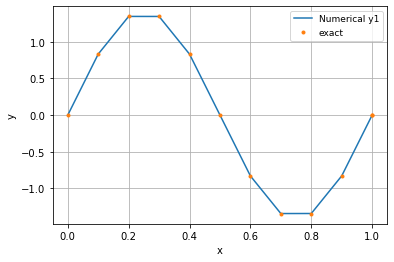

In [21]:
plt.plot(X,Y[:,0],label='Numerical y1')
plt.plot(X,yE,'.',label='exact')
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper right', prop={'size':9})

# Para una estrella de Bosones

In [22]:
from scipy import optimize
from scipy import integrate

In [23]:
def shooting(func,u,x0,x,xf,step,k,h=0.01):
    def res(u):# Boundary condition residual
        X,Y = Integrate(func,x0,IC(u,k),x,h)
        y = Y[len(Y) - 1]#last value of Y
        r = np.zeros(len(u))
        r[0] = y[0]#y0(inf)=0
        r[1] = y[2]/x + y[3]#y_3(inf)/r + y_4(inf)=0
        return r
    x_list = []
    root_list = []
    while x<=xf:
        #print("x=",x)
        x_list.append(x)
        #print("u=",u)
        root = optimize.root(res,u)
        #print("root=",root)
        u = root.x
        #print("u=",u)
        root_temp = optimize.root(res,root.x)
        #print("root_temp=",root_temp)
        root_list.append(root_temp.x)
        X,Y = Integrate(func,x0,IC(root_temp.x,k),x,h)
        x = x+step
    return X,Y,root_temp,np.array(x_list),np.array(root_list)

In [24]:
########
def IC(u,k):#Initial conditions array, the first correspond to the initial condition in phi
    return np.array([k,0.0,u[0],0.0,u[1]])

In [30]:
########
def f0(x,y):
    l = 0.
    F = np.zeros(5)
    if x==0:
        F[0] = y[1]
        F[1] = 2.*y[0]*(y[2]-y[4])
        F[2] = y[3]
        F[3] = 0.
        F[4] = 0.
    else:
        F[0] = y[1]
        F[1] = -2.*(l+1.)*y[1]/x +2.*y[0]*(y[2]-y[4])
        F[2] = y[3]
        F[3] = (2.*l+1.)*x**(2.*l)*y[0]**2. - 2.*y[3]/x
        F[4] = 0.
    return F

In [34]:
def func(x,y):
    F = np.zeros(5)
    F[0] = y[1]
    F[1] = 2.*y[0]*(y[2]-y[4]) -2.*y[1]/x
    F[2] = y[3]
    F[3] = y[0]**2. -2.*y[3]/x
    F[4] = 0
    return F

In [35]:
x0_0 = 3.#first integration
x0_0v1 = 0.01 # Start of integration
xf_0v1 = 10. # End of integration
step_0 = 0.5
u1_0 = 0.63173215# 1st trial value of unknown init. cond.
u2_0 = 1.28125868# 2nd trial value of unknown init. cond.
u_0 = np.array([u1_0, u2_0])
phi0_0 = 1.

In [36]:
X0_f,Y0_f,root0_f,arr_x0,arr_list0=shooting(func,u_0,x0_0v1,x0_0,xf_0v1,step_0,k=phi0_0)

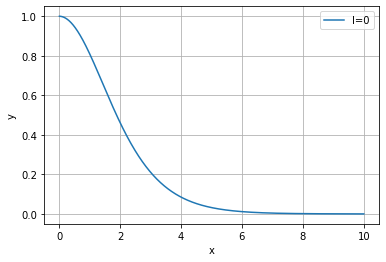

In [37]:
plt.plot(X0_f,Y0_f[:,0],label='l=0')
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper right', prop={'size':10})